In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as ticker
import itertools
import collections 
import matplotlib as mpl
import matplotlib.artist as artists
from figure_dict import *
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as mcolors

%matplotlib inline 
plt.style.use('figures')

In [2]:
#input
fname = "input/CD-spectra/20180527-SsHelixMutant-Spectra.xlsx"
temp1 = "25"
temp2 = "30"

#Output
dirOut = "output/CD-spectra/"
experiment = "CD-spectra"
fout = dirOut+experiment+'.pdf'
fout1 = dirOut+experiment+'-wtonly.pdf'
fout2 = dirOut+experiment+'-subplots.pdf'
fout3 = dirOut+experiment+'-percentsignal.csv'
fout4 = dirOut+experiment+'-30C-percentWTsignal.csv'
fout5 = dirOut+experiment+'-singlevsdouble-30C-percentWTsignal.pdf'

#Output
dirOut = "output/CD-spectra/"
experiment = "CD-spectra-12mut"
fout = dirOut+experiment+'.pdf'
fout1 = dirOut+experiment+'-wtonly.pdf'
fout2 = dirOut+experiment+'-subplots.pdf'
fout3 = dirOut+experiment+'-percentsignal.csv'
fout4 = dirOut+experiment+'-30C-percentWTsignal.csv'
fout5 = dirOut+experiment+'-singlevsdouble-30C-percentWTsignal.pdf'


In [3]:
xls = pd.ExcelFile(fname)
#mre for mutants: cols = wavelength, mut1, mut2...
#RT
df = xls.parse(temp1) 
#30C
df2 = xls.parse(temp2) 

df = df.drop(['M73A_I107K'], axis=1)
df2 = df2.drop(['M73A_I107K'], axis=1)


In [4]:
x = df["Wavelength"]
x2 = df2["Wavelength"]
#remove wavelength
df =   df.iloc[:,1:]
df2 = df2.iloc[:,1:]
dict_temp1 = df.to_dict(orient = "list")
dict_temp2 = df2.to_dict(orient = "list")
protlist = list(df)
protlist2 = list(df2)

In [5]:
#read in list of files, use to get proteins  
marker_p =   ["o"] * len(protlist)
markersize_p =  [120] * len(protlist)
markerdict = dict(zip(protlist, marker_p))
sizedict = dict(zip(protlist, markersize_p))

marker_p =   ["*"] * len(protlist2)
markersize_p =  [120] * len(protlist2)
markerdict2 = dict(zip(protlist2, marker_p))
sizedict2 = dict(zip(protlist2, markersize_p))



In [6]:
df2.head()

,SsWT,I45A,I45K,S70A,M73A,I107A,I107K,I45A_S70A,I45A_M73A,I45K_S70A,I45K_I107A,I45K_I107K,S70A_I107K
0,-0.068275,0.027561,-0.006087,0.015897,0.029483,0.021333,0.051877,-0.011833,-0.063692,-0.024218,-0.022771,0.019704,-0.006576
1,-0.091994,0.026522,-0.005538,-0.011258,0.028075,0.036763,0.042800,-0.011628,-0.035918,-0.005007,-0.012019,0.005249,-0.007134
2,-0.108974,0.016663,-0.006325,-0.032267,0.026668,0.015128,0.043143,-0.015886,-0.042454,-0.018541,-0.027130,-0.003863,-0.016664
3,-0.127333,-0.034214,-0.046493,-0.051339,0.008251,-0.003692,0.012787,-0.043909,-0.071465,-0.020290,-0.066620,-0.023579,-0.034831
4,-0.108447,-0.071949,-0.034548,-0.054391,0.026199,0.015504,-0.000954,-0.043018,-0.070299,-0.041899,-0.089635,-0.032300,-0.037017


## WT only - 25 vs 30C ##

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


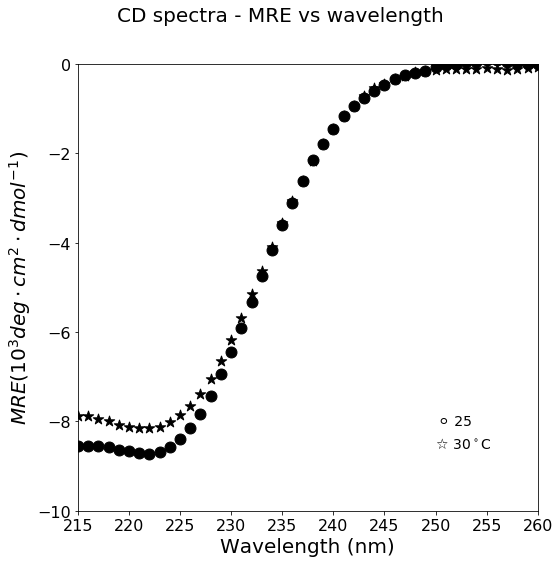

In [7]:
## WT ONLY ##
fig, ax = plt.subplots(figsize=(8,8))
 
fig_title = u'CD spectra - MRE vs wavelength' 
fig.suptitle(fig_title, fontsize=20)
plt.subplots_adjust(hspace=0.1)
fig_subtitle = "10mM KPi pH 7.2"

q = "SsWT"
ax.scatter(x, dict_temp1[q], c= colordictCat[q], marker=markerdict[q], s=sizedict[q],label=(q), linewidth='1', edgecolor='black')
ax.scatter(x, dict_temp2[q], c= colordictCat[q], marker=markerdict2[q], s=sizedict2[q],label=(q), linewidth='1', edgecolor='black')
#legend = ax.legend(loc="lower right", borderaxespad=1, ncol=2, handletextpad=0.1)        
str1 = u'\u26aa ' + temp1 + " "
str2 = u' \u2606 ' + str(temp2) + '$^\circ$C'
ax.text(254, -8.0, str1, ha='right', va='center')
ax.text(255.5, -8.5, str2, ha='right', va='center')
ax.set_xlim([215,260])
ax.set_ylim([-10,0])
ax.set_xlabel(labeldict["wavelength"])
ax.set_ylabel(labeldict["MRE-spectra"])

fig.tight_layout()
fig.subplots_adjust(top = 0.88)
fig.show()
fig.savefig(fout1)

In [8]:
#number mutants = column # - 2 (exclude wavelength and WT)
nummutants = df.shape[1]
numcols = 2
#round up to nearest integer
numrows = int(nummutants//numcols+(nummutants%numcols>0))
print numrows

7


## Mutant vs WT - 25 vs 30C ##

In [9]:
df.head()

,SsWT,I45A,I45K,S70A,M73A,I107A,I107K,I45A_S70A,I45A_M73A,I45K_S70A,I45K_I107A,I45K_I107K,S70A_I107K
0,-0.004454,-0.033929,0.033417,-0.006698,0.036559,-0.008074,0.007716,-0.054729,-0.032050,0.066084,0.098120,-0.002853,0.028152
1,0.001645,-0.041898,0.069144,-0.029187,0.031326,0.000702,0.014126,-0.037078,-0.046885,0.083348,0.051625,0.002430,0.028252
2,0.024181,-0.027038,0.126266,-0.003555,0.048651,0.061914,0.026141,0.008892,-0.022479,0.100335,0.073259,0.061787,0.090266
3,0.038026,0.005545,0.132573,0.009851,0.083694,0.048253,0.032261,0.051962,0.002625,0.102611,0.065206,0.081268,0.104725
4,0.088729,0.002910,0.175737,0.033571,0.106658,0.071401,0.049126,0.076503,0.016376,0.095192,0.112884,0.095001,0.123112


In [10]:
def allScatters(df, temp):
    ###--- plot scatter and line graph of urea titration for all mutants
    fig, ax = plt.subplots(figsize=(figsize["Height"],figsize["Double"]))

    fig_title = 'CD spectra - MRE vs wavelength -' + temp
    #fig.suptitle(fig_title, fontsize=20)
    plt.subplots_adjust(hspace=0.1)
    #fig_subtitle = "10mM KPi pH 7.2"

    for p in df.drop(["SsWT"], axis=1):
        plabel = p.replace("_", "/")
        if p == "I45A_M73A":
            ax.scatter(x, df[p], c= colordictCat[p], marker=markerdict[p], s=sizedict[p], label=(plabel), linewidth='0.5',edgecolor="black")
        else:
            ax.scatter(x, df[p], c= colordictCat[p], marker=markerdict[p], s=sizedict[p], label=(plabel), linewidth='0.5')

    p = "SsWT"
    plabel = p.replace("_", "/")
    ax.scatter(x, df[p], c= colordictCat[p], marker=markerdict[p], s=sizedict[p], label=(plabel), linewidth='0.5')
    
    legend = ax.legend(loc="lower right", borderaxespad=1, ncol=2, handletextpad=0.1)        
    ax.set_xlim([215,260])
    ax.set_ylim([-10,0])
    ax.set_xlabel(u'Wavelength (nm)')
    ax.set_ylabel(r'$MRE (10^3 deg \cdot cm^2 \cdot dmol^{-1})$')
     
    ## red to blue colorbar
    cmap = mpl.cm.get_cmap("coolwarm")
    norm = mpl.colors.Normalize(vmin= -0.2, vmax=0.2)
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    m.set_array([])
    #cbar = plt.colorbar(m)
    #cbar.set_label('s', rotation=90,labelpad=10)
    #cbar = plt.colorbar(m)
    #cbar.set_label('s', rotation=90,labelpad=10)

    fig.tight_layout()
    fig.subplots_adjust(top = 0.88)
    
    return (fig)

    

In [11]:
## Figure 3 ##

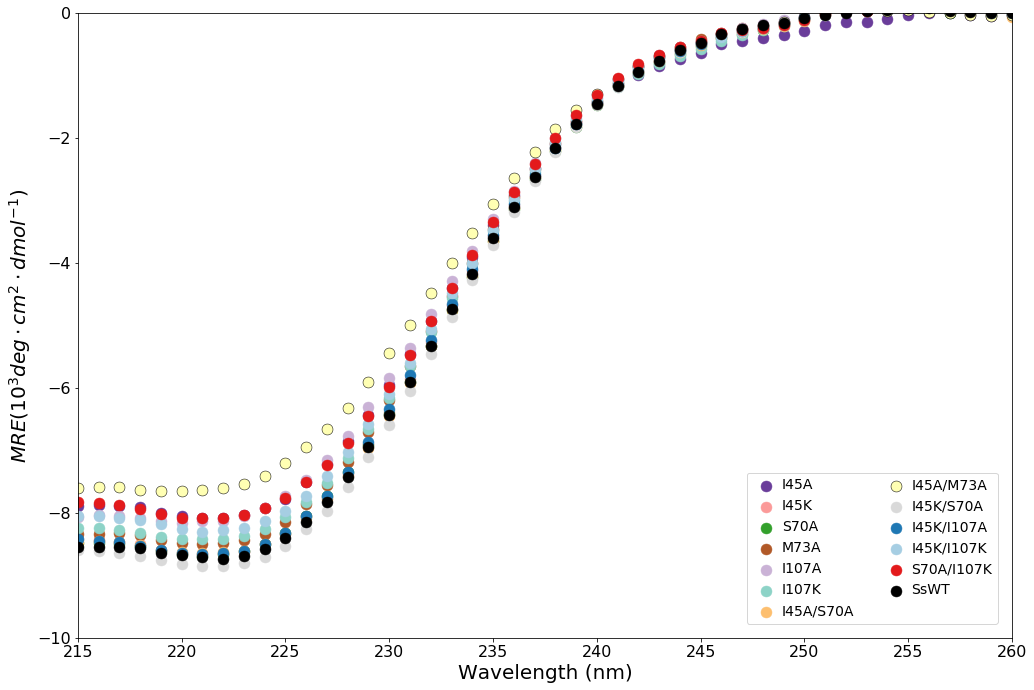

In [12]:
fout = dirOut+experiment+"-"+temp1+'-allscatters.pdf'
fig = allScatters(df, temp1)
fig.show()
fig.savefig(fout)

output/CD-spectra/CD-spectra-12mut-30-allscatters.pdf


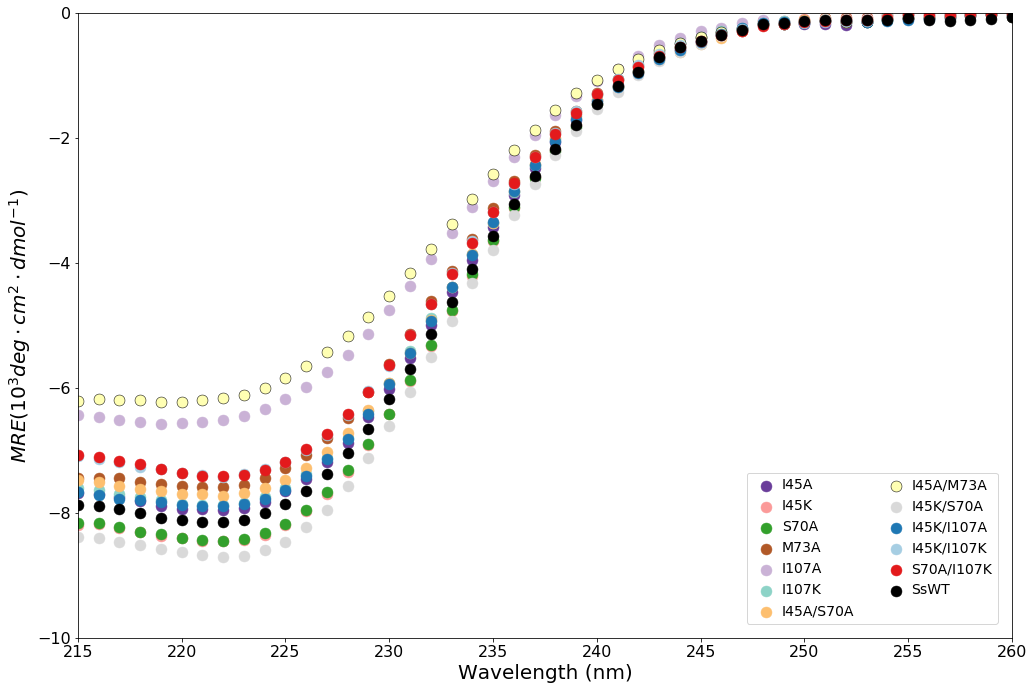

In [13]:
fout = dirOut+experiment+"-"+temp2+'-allscatters.pdf'
fig = allScatters(df2, temp2)
fig.show()
print fout
fig.savefig(fout)

In [14]:
xls = pd.ExcelFile(fname)
#mre for mutants: cols = wavelength, mut1, mut2...
df = xls.parse(temp1) 
df2 = xls.parse(temp2) 

In [15]:
RT = df.loc[df['Wavelength'] == 222]
thirty = df2.loc[df2['Wavelength'] == 222]
percentsignal = thirty.div(RT, axis = "row")*100
#df.at['Wavelength', 'Wavelength'] = 10
percentsignal.set_index('Wavelength')
percentsignal.index = ["222"]
percentsignal = percentsignal.drop(['Wavelength'], axis=1).round(decimals=2)
percentsignal.to_csv(fout3, index=True, index_label = "Wavelength")
percentsignal

,SsWT,I45A,I45K,S70A,M73A,I107A,I107K,I45A_S70A,I45A_M73A,I45K_S70A,I45K_I107A,M73A_I107K,I45K_I107K,S70A_I107K
222,93.27,98.45,97.7,97.64,89.43,80.23,93.61,89.53,81.0,98.42,91.21,78.34,89.69,91.64


In [16]:
thirty

,Wavelength,SsWT,I45A,I45K,S70A,M73A,I107A,I107K,I45A_S70A,I45A_M73A,I45K_S70A,I45K_I107A,M73A_I107K,I45K_I107K,S70A_I107K
38,222,-8.145983,-7.950954,-8.452485,-8.452386,-7.587563,-6.517801,-7.880666,-7.729456,-6.160633,-8.706411,-7.883332,-5.457719,-7.422789,-7.407941


In [17]:
thirty = df2.loc[df2['Wavelength'] == 222]
thirty.set_index('Wavelength')
thirty.index = ["222"]
thirty = thirty.drop(['Wavelength'], axis=1).T

In [18]:
thirty

,222
SsWT,-8.145983
I45A,-7.950954
I45K,-8.452485
S70A,-8.452386
M73A,-7.587563
I107A,-6.517801
I107K,-7.880666
I45A_S70A,-7.729456
I45A_M73A,-6.160633
I45K_S70A,-8.706411


In [19]:
thirty["PercentWT"] = thirty['222']/thirty.loc["SsWT","222"]
thirty["PercentLoss"] = (1- thirty['PercentWT'])*100
thirty

,222,PercentWT,PercentLoss
SsWT,-8.145983,1.000000,0.000000
I45A,-7.950954,0.976058,2.394172
I45K,-8.452485,1.037626,-3.762616
S70A,-8.452386,1.037614,-3.761404
M73A,-7.587563,0.931448,6.855155
I107A,-6.517801,0.800125,19.987534
I107K,-7.880666,0.967430,3.257027
I45A_S70A,-7.729456,0.948867,5.113278
I45A_M73A,-6.160633,0.756279,24.372134
I45K_S70A,-8.706411,1.068798,-6.879808
